# Simple Linear Model To Predict Financial Returns

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [39]:
data = pd.read_csv("../csv_files_example/five_minute.csv", parse_dates = ["time"], index_col = "time")

In [40]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [41]:
data["lag1"] = data.returns.shift(1)

In [42]:
data

,price,returns,lag1
time,,,
2019-01-01 22:00:00+00:00,1.146580,NaN,NaN
2019-01-01 22:05:00+00:00,1.146350,-0.000201,NaN
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027


In [43]:
data.dropna(inplace = True)

In [44]:
lm = LinearRegression(fit_intercept=True)

In [45]:
lm.fit(data.lag1.to_frame(), data.returns)

LinearRegression()

In [46]:
slope = lm.coef_
slope

array([-0.03350837])

In [47]:
intercept = lm.intercept_
intercept

-3.2442471445009334e-07

In [48]:
data["pred"] = lm.predict(data.lag1.to_frame())
data

,price,returns,lag1,pred
time,,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201,6.397912e-06
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026,5.525013e-07
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000,-3.244247e-07
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183,-6.462425e-06
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,1.283038e-06
...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,3.414522e-06
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-1.748582e-07
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-1.221814e-06


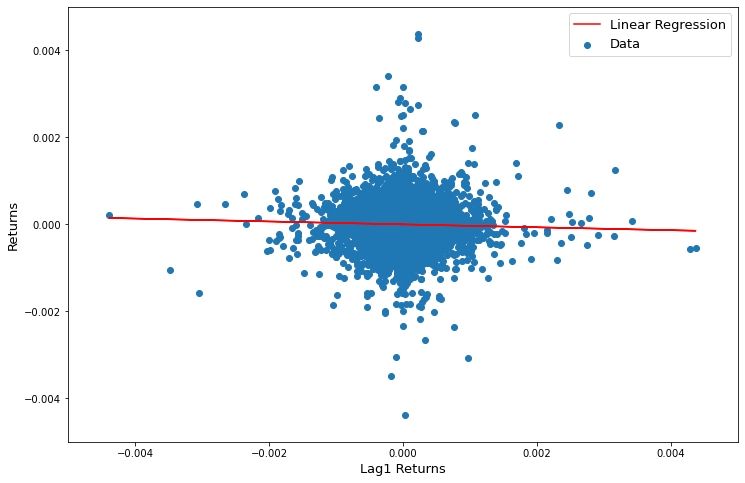

In [49]:
plt.figure(figsize = (12, 8))
plt.scatter(x = data.lag1, y = data.returns, label = "Data")
plt.plot(data.lag1, data.pred, c = "red", label = "Linear Regression")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.legend(fontsize = 13)
plt.xlabel("Lag1 Returns", fontsize = 13)
plt.ylabel("Returns", fontsize = 13)
plt.show()

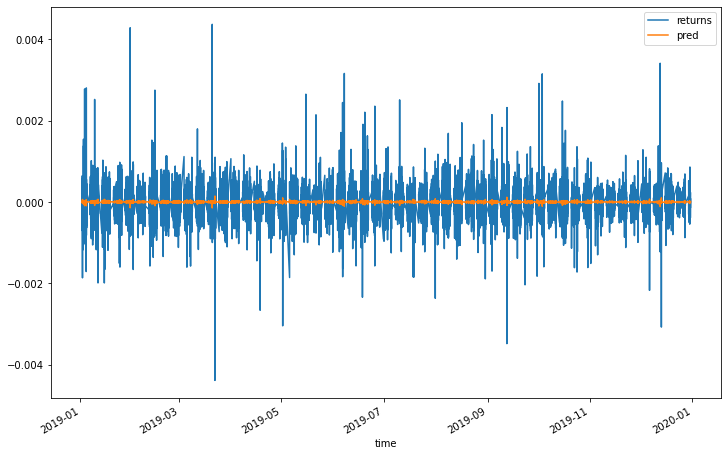

In [50]:
data[["returns", "pred"]].plot(figsize = (12, 8))
plt.show()

In [51]:
data.pred = np.sign(data.pred) # Maybe the model can predict the market direction (1, -1) instead of the returns
data

,price,returns,lag1,pred
time,,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201,1.0
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026,1.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000,-1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183,-1.0
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,1.0
...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-1.0


In [52]:
np.sign(data.returns * data.pred)

time
2019-01-01 22:10:00+00:00   -1.0
2019-01-01 22:15:00+00:00    0.0
2019-01-01 22:20:00+00:00   -1.0
2019-01-01 22:25:00+00:00    1.0
2019-01-01 22:30:00+00:00   -1.0
                            ... 
2019-12-30 23:35:00+00:00   -1.0
2019-12-30 23:40:00+00:00   -1.0
2019-12-30 23:45:00+00:00   -1.0
2019-12-30 23:50:00+00:00    1.0
2019-12-30 23:55:00+00:00   -1.0
Length: 73718, dtype: float64

In [53]:
hits = np.sign(data.returns * data.pred).value_counts()
hits

 1.0    37451
-1.0    34308
 0.0     1959
dtype: int64

In [54]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio # Percentage of correctly forecasted market directions

0.5080306031091457

# Multiple Regression Model

In [55]:
data = pd.read_csv("../csv_files_example/five_minute.csv", parse_dates = ["time"], index_col = "time")
data.info()
data.dropna(inplace = True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73720 entries, 2019-01-01 22:00:00+00:00 to 2019-12-30 23:55:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   73720 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [56]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [57]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = f"lag{lag}"
    data[col] = data.returns.shift(lag)
    cols.append(col)
    data.dropna(inplace = True)
data

,price,returns,lag1,lag2,lag3,lag4,lag5
time,,,,,,,
2019-01-01 23:20:00+00:00,1.146695,0.000022,0.000065,0.000057,-0.000017,0.000122,-0.000057
2019-01-01 23:25:00+00:00,1.146650,-0.000039,0.000022,0.000065,0.000057,-0.000017,0.000122
2019-01-01 23:30:00+00:00,1.146555,-0.000083,-0.000039,0.000022,0.000065,0.000057,-0.000017
2019-01-01 23:35:00+00:00,1.146630,0.000065,-0.000083,-0.000039,0.000022,0.000065,0.000057
2019-01-01 23:40:00+00:00,1.146500,-0.000113,0.000065,-0.000083,-0.000039,0.000022,0.000065
...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022


In [58]:
cols

['lag1', 'lag2', 'lag3', 'lag4', 'lag5']

In [59]:
lm = LinearRegression(fit_intercept = True)

In [60]:
lm.fit(data[cols], data.returns)

LinearRegression()

In [61]:
lm.coef_


array([-0.03357863, -0.00243597,  0.00365061, -0.00366316, -0.00360259])

In [62]:
lm.intercept_

-3.301994825279733e-07

In [63]:
data["pred"] = lm.predict(data[cols].values)

In [64]:
data.pred= np.sign(data.pred)
data

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2019-01-01 23:20:00+00:00,1.146695,0.000022,0.000065,0.000057,-0.000017,0.000122,-0.000057,-1.0
2019-01-01 23:25:00+00:00,1.146650,-0.000039,0.000022,0.000065,0.000057,-0.000017,0.000122,-1.0
2019-01-01 23:30:00+00:00,1.146555,-0.000083,-0.000039,0.000022,0.000065,0.000057,-0.000017,1.0
2019-01-01 23:35:00+00:00,1.146630,0.000065,-0.000083,-0.000039,0.000022,0.000065,0.000057,1.0
2019-01-01 23:40:00+00:00,1.146500,-0.000113,0.000065,-0.000083,-0.000039,0.000022,0.000065,-1.0
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.0


In [65]:
data.pred.value_counts()

-1.0    39620
 1.0    34084
Name: pred, dtype: int64

In [66]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5080306031091457

   # In-sample Backtesting Strategy

In [67]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2019-01-01 23:20:00+00:00,1.146695,0.000022,0.000065,0.000057,-0.000017,0.000122,-0.000057,-1.0
2019-01-01 23:25:00+00:00,1.146650,-0.000039,0.000022,0.000065,0.000057,-0.000017,0.000122,-1.0
2019-01-01 23:30:00+00:00,1.146555,-0.000083,-0.000039,0.000022,0.000065,0.000057,-0.000017,1.0
2019-01-01 23:35:00+00:00,1.146630,0.000065,-0.000083,-0.000039,0.000022,0.000065,0.000057,1.0
2019-01-01 23:40:00+00:00,1.146500,-0.000113,0.000065,-0.000083,-0.000039,0.000022,0.000065,-1.0
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.0


In [68]:
data["strategy"] = data.pred * data.returns

In [69]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

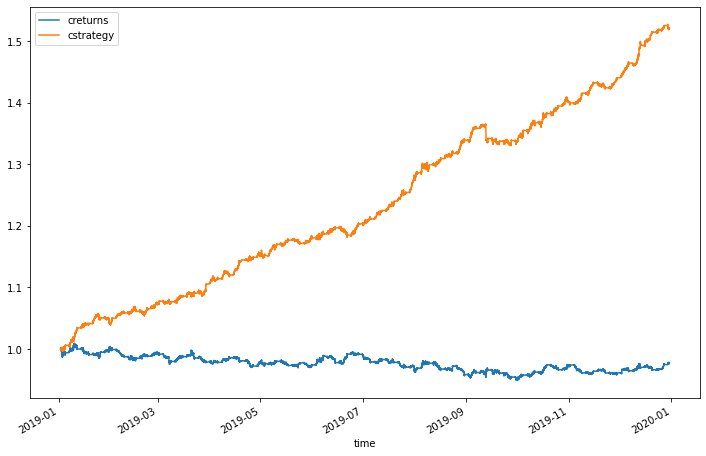

In [70]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8))
plt.show()

In [71]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [72]:
data.trades.value_counts()

0.0    37097
2.0    36607
Name: trades, dtype: int64

In [73]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5080306031091457

# Out-Sample Forward Testing

In [76]:
data = pd.read_csv("../csv_files_example/five_minute.csv", parse_dates = ["time"], index_col = "time")

In [77]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [78]:
lags = 5

In [79]:
cols = []
for lag in range(1, lags + 1):
    col = f"lag{lag}"
    data[col] = data.returns.shift(lag)
    cols.append(col)
    data.dropna(inplace = True)
data

,price,returns,lag1,lag2,lag3,lag4,lag5
time,,,,,,,
2019-01-01 23:20:00+00:00,1.146695,0.000022,0.000065,0.000057,-0.000017,0.000122,-0.000057
2019-01-01 23:25:00+00:00,1.146650,-0.000039,0.000022,0.000065,0.000057,-0.000017,0.000122
2019-01-01 23:30:00+00:00,1.146555,-0.000083,-0.000039,0.000022,0.000065,0.000057,-0.000017
2019-01-01 23:35:00+00:00,1.146630,0.000065,-0.000083,-0.000039,0.000022,0.000065,0.000057
2019-01-01 23:40:00+00:00,1.146500,-0.000113,0.000065,-0.000083,-0.000039,0.000022,0.000065
...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022


In [80]:
data["pred"] = lm.predict(data[cols].values)
data

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2019-01-01 23:20:00+00:00,1.146695,0.000022,0.000065,0.000057,-0.000017,0.000122,-0.000057,-2.971383e-06
2019-01-01 23:25:00+00:00,1.146650,-0.000039,0.000022,0.000065,0.000057,-0.000017,0.000122,-1.390681e-06
2019-01-01 23:30:00+00:00,1.146555,-0.000083,-0.000039,0.000022,0.000065,0.000057,-0.000017,1.028407e-06
2019-01-01 23:35:00+00:00,1.146630,0.000065,-0.000083,-0.000039,0.000022,0.000065,0.000057,2.183256e-06
2019-01-01 23:40:00+00:00,1.146500,-0.000113,0.000065,-0.000083,-0.000039,0.000022,0.000065,-2.783561e-06
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,3.236302e-06
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-3.934446e-08
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.640939e-06


In [81]:
data.pred = np.sign(data.pred)

In [82]:
hits = np.sign(data.returns * data.pred).value_counts()
hits

 1.0    37491
-1.0    34256
 0.0     1957
dtype: int64

In [83]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.508669814392706

In [84]:
data["strategy"] = data.pred * data.returns
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)